In [77]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs
import pandas as pd

In [78]:
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0

In [79]:
frags = pd.read_json("../data/bengio2021_fragments_105.json")

In [142]:
two_stem_frags = frags[frags["frag_stems"].apply(len) == 1]

In [143]:
two_stem_frags

,frag_name,frag_smiles,frag_stems
3,C=O_0,C=O,[0]
7,O_0,O,[0]
8,C_0,C,[0]
15,O=CNO_2,O=CNO,[1]
16,O=CO_2,O=CO,[1]
17,CCC_2,CCC,[1]
18,c1ccc2ccccc2c1_0,c1ccc2ccccc2c1,[0]
19,c1ccc2ccccc2c1_4,c1ccc2ccccc2c1,[2]
22,C1CCCC1_0,C1CCCC1,[0]
25,F_0,F,[0]


In [150]:
smi = two_stem_frags["frag_smiles"].iloc[12]
idxs = two_stem_frags["frag_stems"].iloc[12]

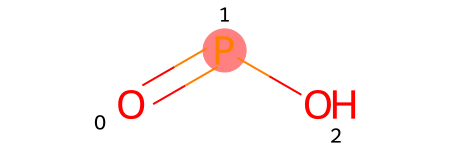

In [151]:
mol = Chem.MolFromSmiles(smi)
mol.__sssAtoms = idxs
mol

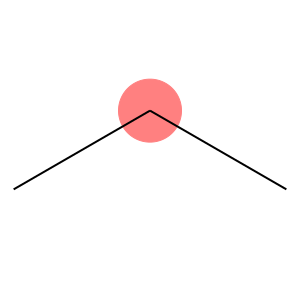

In [125]:
Draw.MolToImage(mol, highlightAtoms=idxs, backgroundColor=False, options=dr)

In [120]:
import cairosvg

In [74]:
fname="two_stem_mol_eg"
Draw.MolToFile( mol, fname+".png", highlightAtoms=idxs, options=dr)
Draw.MolToFile( mol, "temp.svg", highlightAtoms=idxs, options=dr)
cairosvg.svg2png( url='./temp.svg', write_to= "svg_"+fname+".png" )